In [36]:
# https://medium.com/@samdrinkswater/sequential-model-for-mnist-dataset-using-tensorflow-25e1fab87b48
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D
import matplotlib.pyplot as plt


In [49]:
! pip install livelossplot

In [50]:
import livelossplot

In [44]:
def display_some_examples(examples, labels, predicts=None):

    plt.figure(figsize=(10,10))

    for i in range(25):

        idx = np.random.randint(0, examples.shape[0]-1)
        img = examples[idx]

        label = str(labels[idx])
        if predicts is not None:
          label = f'{label} ({predicts[idx]})'

        plt.subplot(5,5,i+1)
        plt.title(label)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

    plt.show()

In [123]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [124]:
print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)


x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


In [125]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [126]:
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28)
(28, 28)


## 3 шари нейронів з функціями активациї шарів "relu", "relu" та за замовчуванням.
### Оптимізатор "SGD".


In [189]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
  # tf.keras.layers.Dense(128, activation='sigmoid'),
  # tf.keras.layers.Dense(256, activation='sigmoid'),
  # tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    # optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer=tf.keras.optimizers.SGD(0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

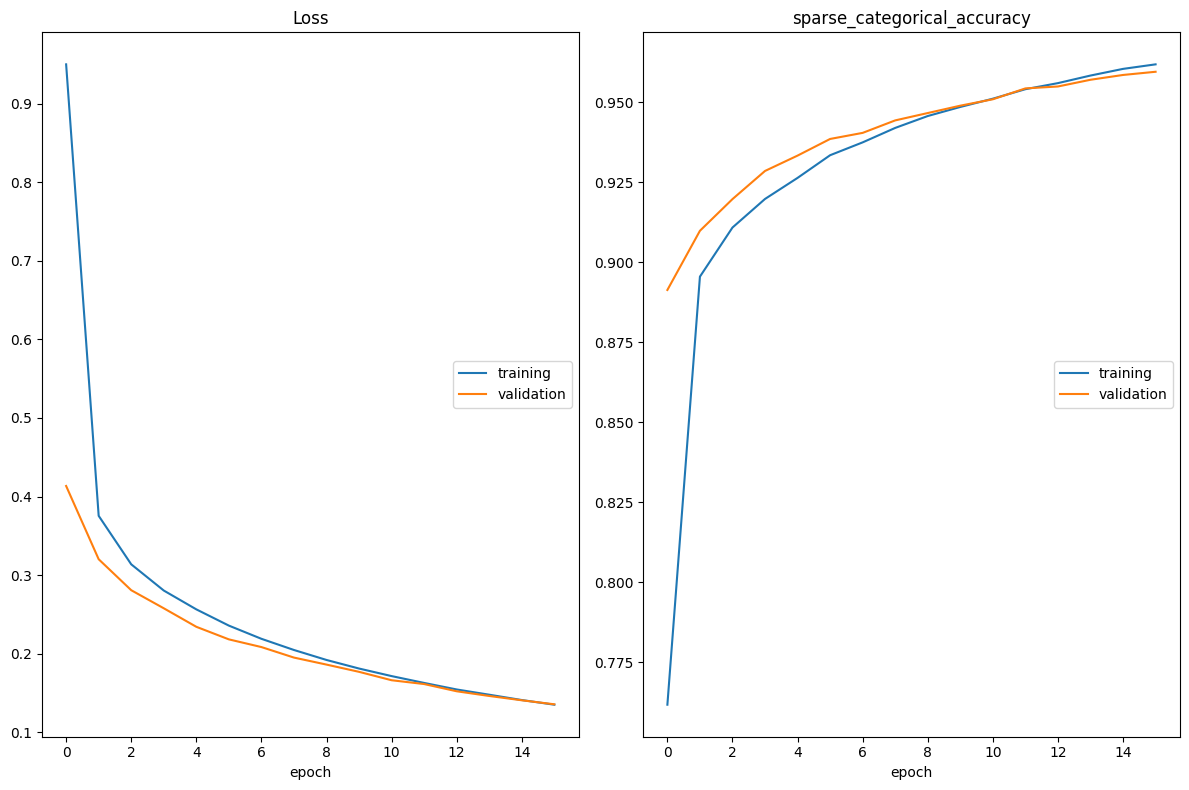

Loss
	training         	 (min:    0.135, max:    0.950, cur:    0.135)
	validation       	 (min:    0.136, max:    0.413, cur:    0.136)
sparse_categorical_accuracy
	training         	 (min:    0.762, max:    0.962, cur:    0.962)
	validation       	 (min:    0.891, max:    0.960, cur:    0.960)
938/938 [==============================] - 5s 5ms/step - loss: 0.1351 - sparse_categorical_accuracy: 0.9618 - val_loss: 0.1356 - val_sparse_categorical_accuracy: 0.9595


In [190]:
plot_losses = livelossplot.PlotLossesKeras()

model.fit(x_train, y_train,
          epochs=16,
          batch_size=64,
          callbacks=[plot_losses],
          # validation_split=0.2,
          validation_data=(x_test, y_test))

In [191]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.1356 - sparse_categorical_accuracy: 0.9595


[0.13564226031303406, 0.9595000147819519]

In [192]:
predictions = model(x_test)
y_pred = tf.math.argmax(predictions, axis=1).numpy()

print("Prediction: {}".format(y_test))
print("    Labels: {}".format(y_pred))

Prediction: [7 2 1 ... 4 5 6]
    Labels: [7 2 1 ... 4 5 6]


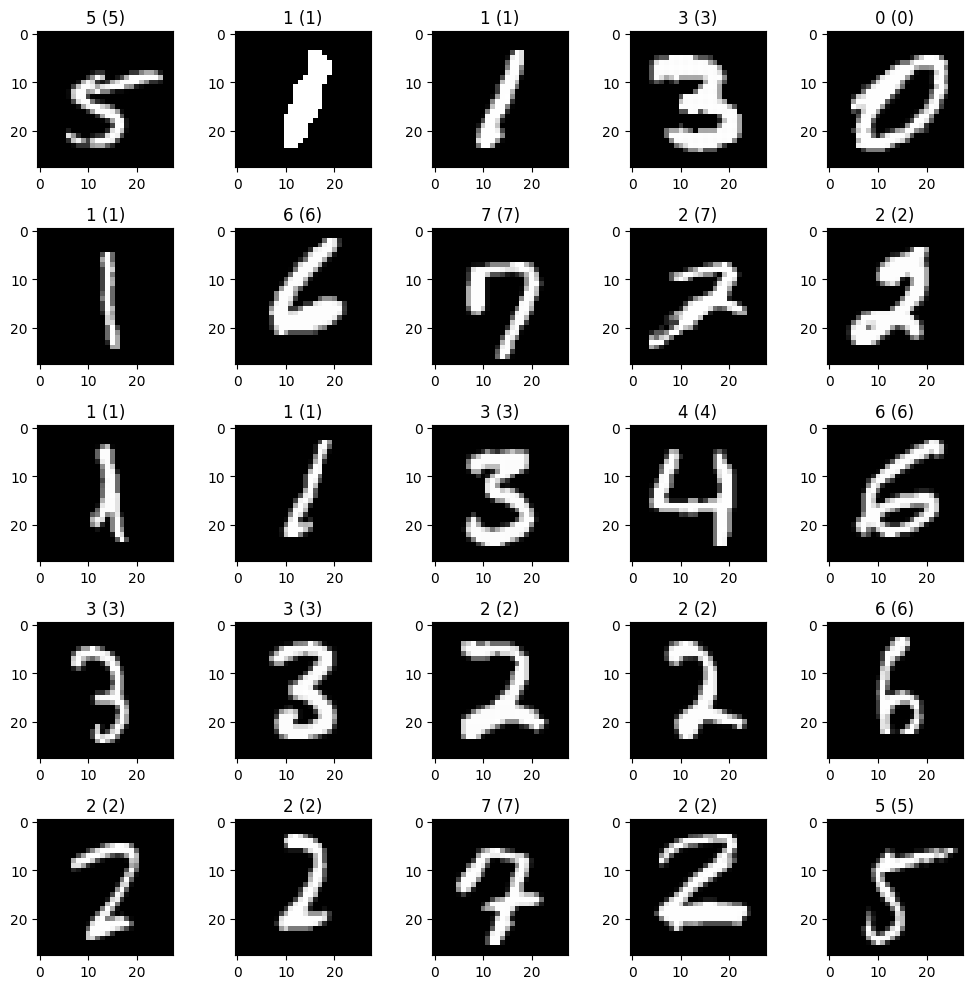

In [219]:
display_some_examples(x_test, y_test, y_pred)

# Висновки:
Вірогідність помилки = 0.1356  
Точність передбачення = 0.960  

З 25-и випадковіх зображень нейронна мережа помилилася 1 раз.


## 3 шари нейронів з функціями активациї шарів "sigmoid", "sigmoid" та "softmax".
### Оптимізатор "SGD".


In [196]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dense(256, activation='relu'),
  # tf.keras.layers.Dense(10)
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(
    # optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer=tf.keras.optimizers.SGD(0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

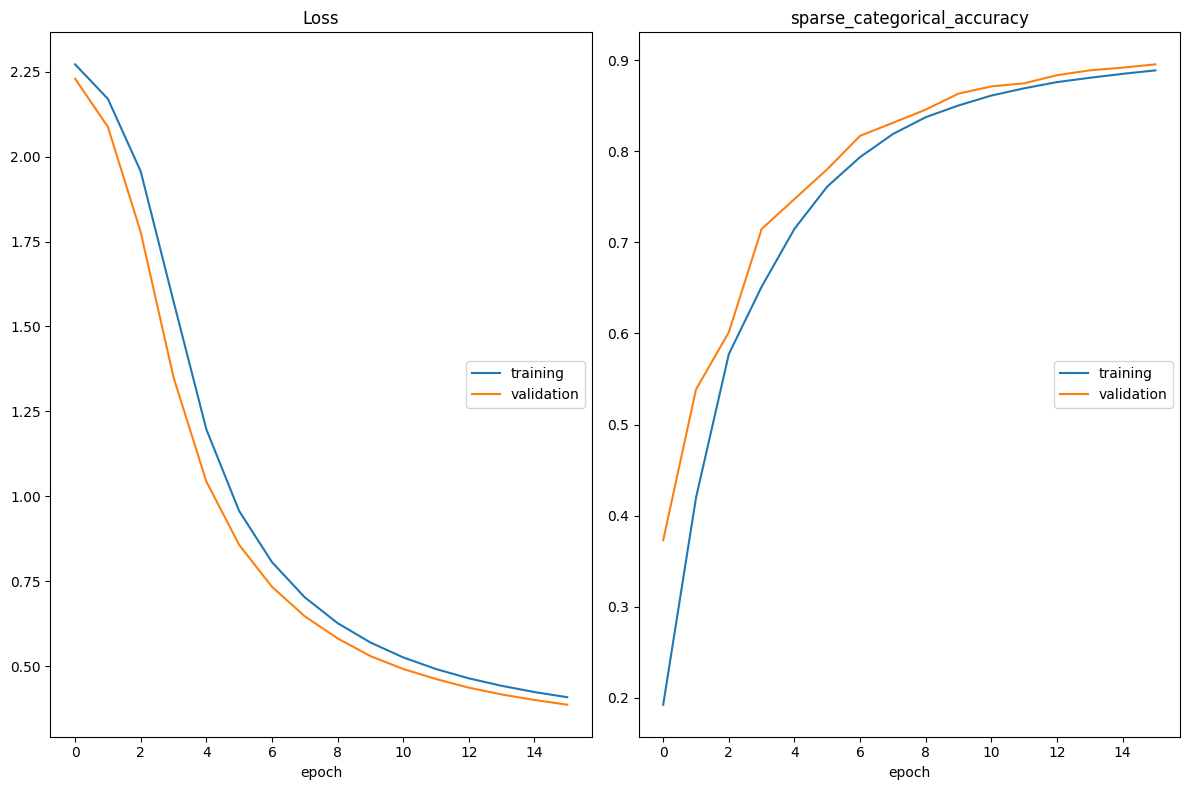

Loss
	training         	 (min:    0.409, max:    2.271, cur:    0.409)
	validation       	 (min:    0.387, max:    2.229, cur:    0.387)
sparse_categorical_accuracy
	training         	 (min:    0.193, max:    0.889, cur:    0.889)
	validation       	 (min:    0.373, max:    0.895, cur:    0.895)
938/938 [==============================] - 5s 5ms/step - loss: 0.4092 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.3872 - val_sparse_categorical_accuracy: 0.8954


In [197]:
plot_losses1 = livelossplot.PlotLossesKeras()

model1.fit(x_train, y_train,
          epochs=16,
          batch_size=64,
          callbacks=[plot_losses1],
          # validation_split=0.2,
          validation_data=(x_test, y_test))

In [198]:
model1.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8954


[0.3872169256210327, 0.8953999876976013]

In [199]:
predictions1 = model1(x_test)
y_pred1 = tf.math.argmax(predictions1, axis=1).numpy()

print("Prediction: {}".format(y_test))
print("    Labels: {}".format(y_pred1))

Prediction: [7 2 1 ... 4 5 6]
    Labels: [7 2 1 ... 4 5 6]


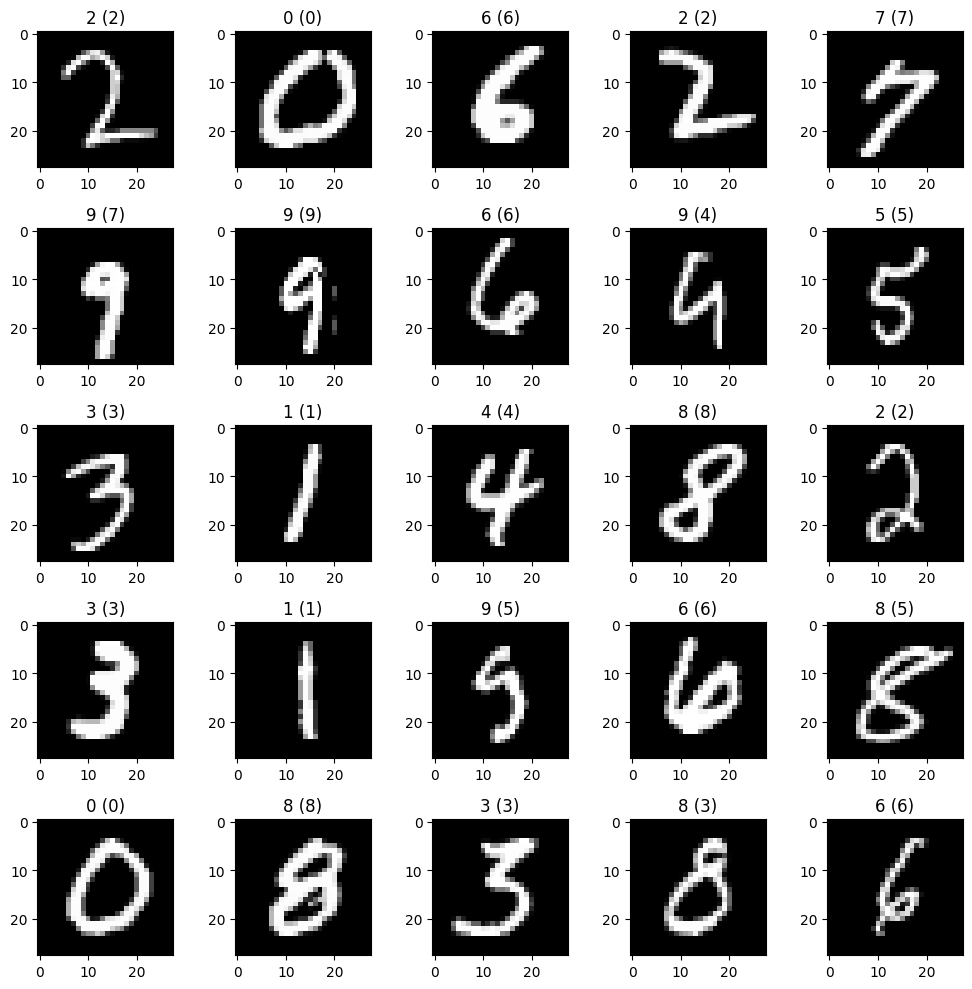

In [200]:
display_some_examples(x_test, y_test, y_pred1)

# Висновки:
Вірогідність помилки = 0.387  
Точність передбачення = 0.895  

З 25-и випадковіх зображень нейронна мережа помилилася 5 разів.


## 3 шари нейронів з функціями активациї шарів "relu", "relu" та за замовчуванням.
### Оптимізатор "Adam".


In [214]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    # optimizer=tf.keras.optimizers.SGD(0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

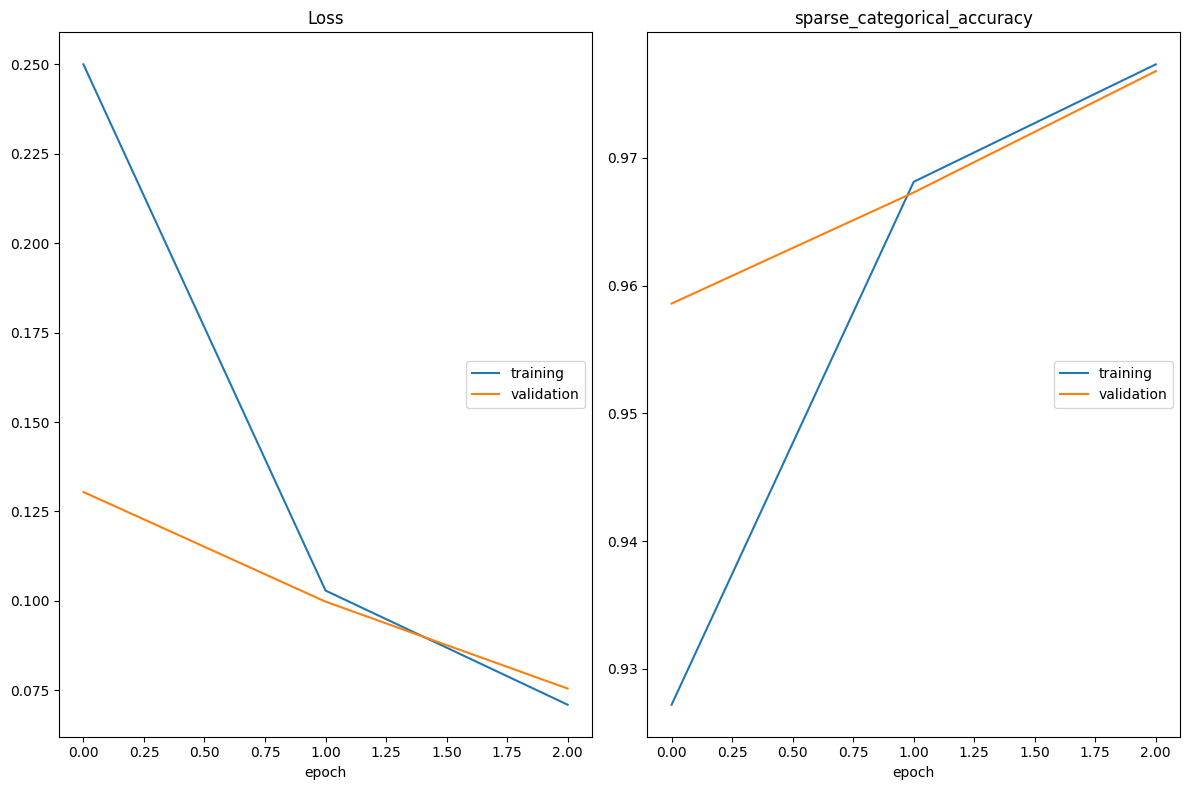

Loss
	training         	 (min:    0.071, max:    0.250, cur:    0.071)
	validation       	 (min:    0.076, max:    0.130, cur:    0.076)
sparse_categorical_accuracy
	training         	 (min:    0.927, max:    0.977, cur:    0.977)
	validation       	 (min:    0.959, max:    0.977, cur:    0.977)
938/938 [==============================] - 6s 7ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0755 - val_sparse_categorical_accuracy: 0.9768


In [215]:
plot_losses2 = livelossplot.PlotLossesKeras()

model2.fit(x_train, y_train,
          epochs=3,
          batch_size=64,
          callbacks=[plot_losses2],
          # validation_split=0.2,
          validation_data=(x_test, y_test))

In [216]:
model2.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.0755 - sparse_categorical_accuracy: 0.9768


[0.07550744712352753, 0.9768000245094299]

In [217]:
predictions2 = model2(x_test)
y_pred2 = tf.math.argmax(predictions2, axis=1).numpy()

print("Prediction: {}".format(y_test))
print("    Labels: {}".format(y_pred2))

Prediction: [7 2 1 ... 4 5 6]
    Labels: [7 2 1 ... 4 5 6]


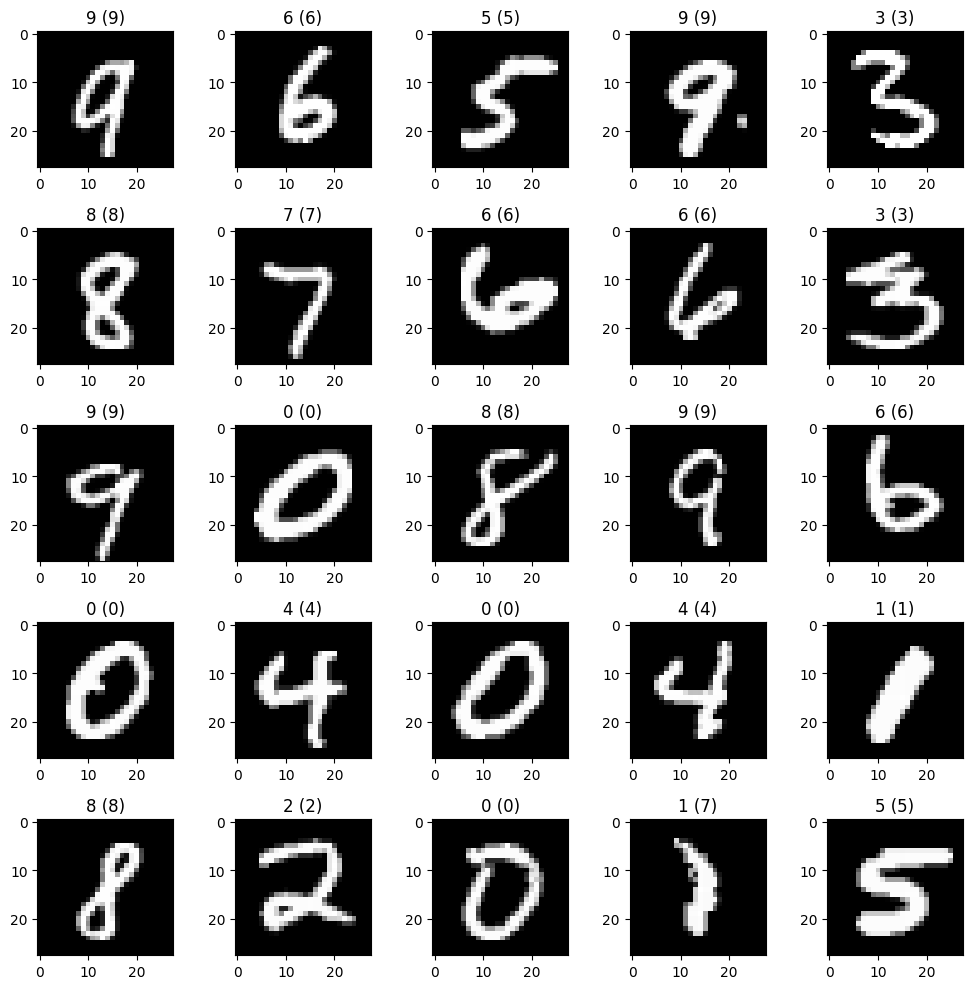

In [218]:
display_some_examples(x_test, y_test, y_pred2)

# Висновки:
Вірогідність помилки = 0.0755  
Точність передбачення = 0.9768  
Оптимальна кількість епох навчання 3, бо далі результати не покращуються.  
### З 25-и випадковіх зображень нейронна мережа помилилася 1 раз.
